In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
(X_train,y_train), (X_test,y_test)= datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:6]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1]], dtype=uint8)

In [ ]:
y_train=y_train.reshape(-1,)
y_train[:6]

array([6, 9, 9, 4, 1, 1], dtype=uint8)

In [ ]:
y_test=y_test.reshape(-1,)

In [ ]:
classes=['airplane','automobile','bird','cat','deer', 'dog', 'frog','horse','ship','truck']

In [ ]:
def plot_sample(X_train, y_train,n=6):
  """

  Args:
    X_train:
    y_train:
    n:
  """

In [ ]:
def plot_sample(X_train,y_train, n=200):
  """

  Args:
    X_train:
    y_train:
    n:
  """

In [ ]:
X_train=X_train/255.0
X_test=X_test/255.0

In [ ]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation='relu'),
    layers.Dense(1000, activation='relu'),
    layers.Dense(10,activation='softmax')
])
ann.compile(optimizer='SGD',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])
ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 166s 106ms/step - loss: 1.8087 - accuracy: 0.3545
Epoch 2/5
1563/1563 [==============================] - 194s 124ms/step - loss: 1.6216 - accuracy: 0.4272
Epoch 3/5
1563/1563 [==============================] - 194s 124ms/step - loss: 1.5382 - accuracy: 0.4575
Epoch 4/5
1563/1563 [==============================] - 169s 108ms/step - loss: 1.4803 - accuracy: 0.4804
Epoch 5/5
1563/1563 [==============================] - 175s 112ms/step - loss: 1.4305 - accuracy: 0.4998


In [ ]:

import numpy as np
from sklearn.metrics import classification_report

# Assuming y_test, y_pred, and y_pred_classes are already defined
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print('Classification report:\n', classification_report(y_test, y_pred_classes))


313/313 [==============================] - 11s 35ms/step
Classification report:
               precision    recall  f1-score   support

           0       0.74      0.30      0.42      1000
           1       0.37      0.86      0.52      1000
           2       0.33      0.45      0.38      1000
           3       0.35      0.27      0.31      1000
           4       0.54      0.23      0.32      1000
           5       0.30      0.55      0.39      1000
           6       0.59      0.42      0.49      1000
           7       0.55      0.55      0.55      1000
           8       0.76      0.37      0.50      1000
           9       0.58      0.39      0.46      1000

    accuracy                           0.44     10000
   macro avg       0.51      0.44      0.43     10000
weighted avg       0.51      0.44      0.43     10000



In [ ]:
import seaborn as sns

<function matplotlib.pyplot.show(close=None, block=None)>

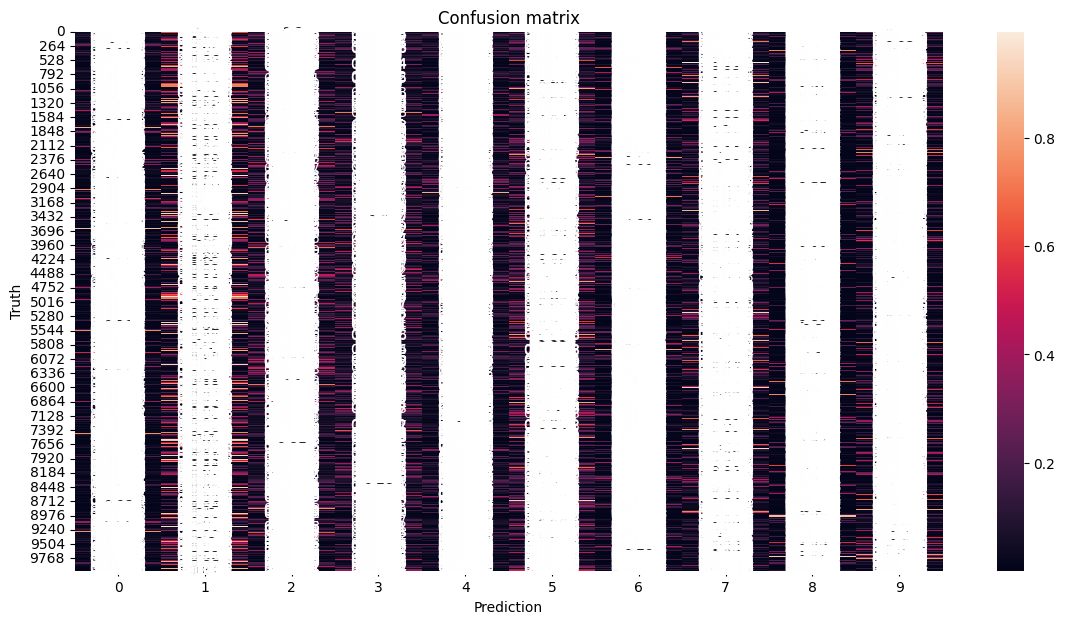

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(y_pred, annot=True)
plt.ylabel('Truth')
plt.xlabel('Prediction')
plt.title('Confusion matrix')
plt.show

In [ ]:
cnn= models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
                  layers.Dense(64, activation='relu'),
                  layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [ ]:
cnn.fit(X_train,y_train, epochs=7)

Epoch 1/7
1563/1563 [==============================] - 69s 43ms/step - loss: 1.4511 - accuracy: 0.4817
Epoch 2/7
1563/1563 [==============================] - 69s 44ms/step - loss: 1.0863 - accuracy: 0.6213
Epoch 3/7
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9631 - accuracy: 0.6645
Epoch 4/7
1563/1563 [==============================] - 65s 41ms/step - loss: 0.8837 - accuracy: 0.6940
Epoch 5/7
1563/1563 [==============================] - 68s 44ms/step - loss: 0.8143 - accuracy: 0.7156
Epoch 6/7
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7558 - accuracy: 0.7361
Epoch 7/7
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7012 - accuracy: 0.7564


In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 6s 18ms/step - loss: 0.9582 - accuracy: 0.6814


[0.9582443237304688, 0.6814000010490417]

In [ ]:
y_pred=cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 4s 12ms/step


array([[1.1913072e-02, 4.6757404e-03, 1.5329612e-02, 7.3803484e-01,
        4.4336556e-03, 8.8606969e-02, 9.8612402e-03, 2.7082977e-03,
        1.2225189e-01, 2.1846467e-03],
       [4.7170653e-04, 9.9617813e-04, 3.0356230e-06, 1.3085880e-08,
        4.7511128e-09, 1.7319664e-10, 6.1524763e-10, 8.9573332e-10,
        9.9852806e-01, 9.2767038e-07],
       [1.6379893e-01, 8.1094451e-02, 1.0375868e-02, 1.8277782e-03,
        5.0242431e-04, 2.3548244e-04, 2.9421330e-04, 1.1719543e-03,
        7.3904759e-01, 1.6513254e-03],
       [9.7376639e-01, 2.6709456e-03, 8.5811893e-04, 1.8164456e-04,
        4.5085257e-05, 2.4515734e-06, 1.4153833e-04, 1.9076047e-05,
        2.2198683e-02, 1.1614845e-04],
       [3.4139030e-06, 5.6270392e-06, 2.3324599e-02, 5.5550694e-02,
        5.7338363e-01, 6.4073661e-03, 3.4119895e-01, 3.6693466e-05,
        8.1849721e-05, 7.1226532e-06]], dtype=float32)

In [ ]:
 y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [ ]:
y_classes=[np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [ ]:
plot_sample(X_test, y_test,9)

In [ ]:
classes[y_classes[5]]

'frog'